Saving cleaned_weather.csv to cleaned_weather (1).csv


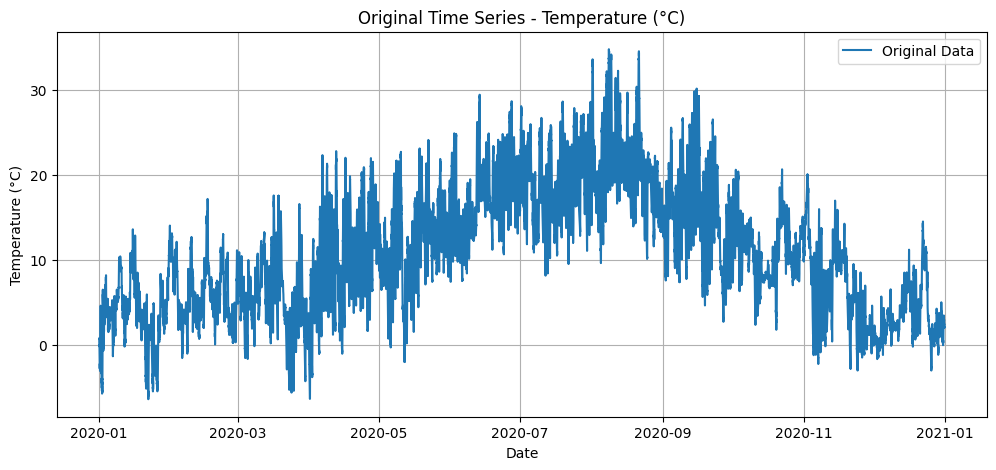

<ipython-input-4-cb40b70d1583>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.resample('M').mean()


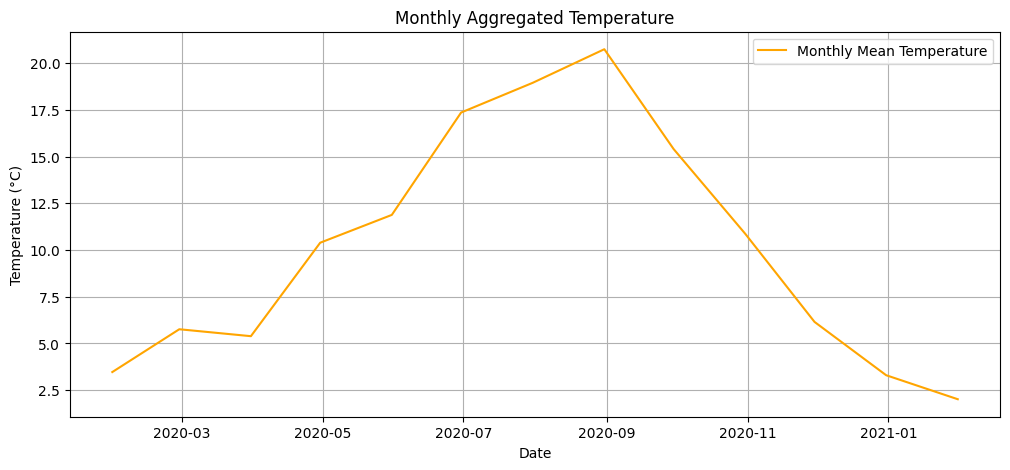

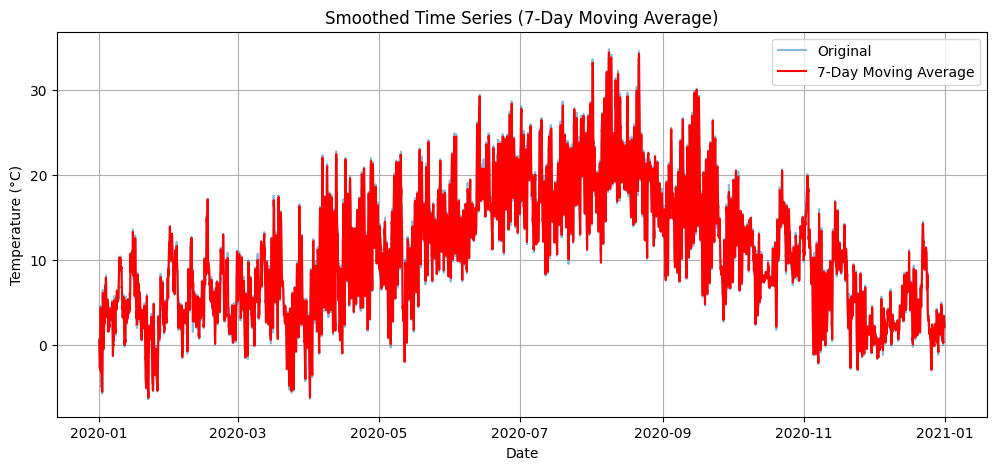

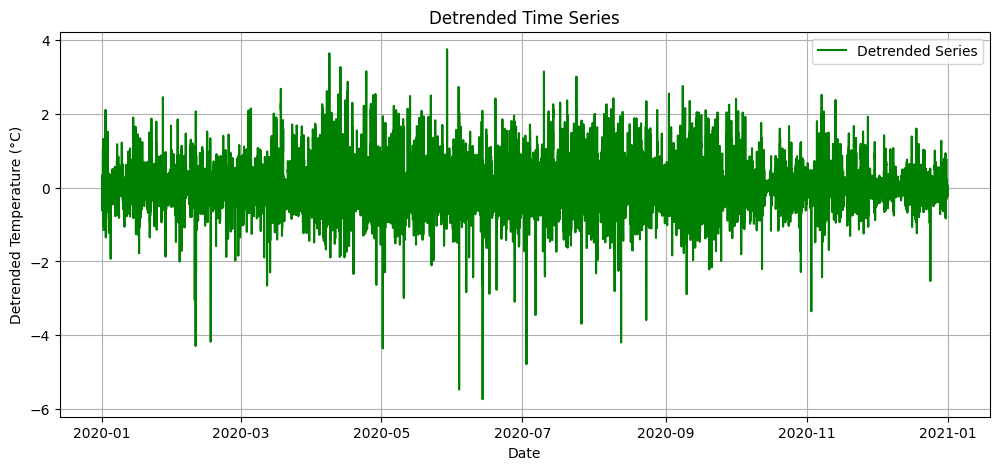

In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Upload the file from your local system
from google.colab import files
uploaded = files.upload()

# Step 3: Load the dataset (your uploaded file name)
df = pd.read_csv('cleaned_weather.csv')

# Step 4: Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Step 5: Use temperature column 'T' for analysis (Temperature in Celsius)
df = df[['T']].dropna()

# Step 6: Plot the original time series
plt.figure(figsize=(12, 5))
plt.plot(df, label='Original Data')
plt.title('Original Time Series - Temperature (°C)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Monthly Aggregation (mean)
monthly_avg = df.resample('M').mean()

plt.figure(figsize=(12, 5))
plt.plot(monthly_avg, label='Monthly Mean Temperature', color='orange')
plt.title('Monthly Aggregated Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Step 8: Smoothing with a 7-day Moving Average
smoothed = df.rolling(window=7).mean()

plt.figure(figsize=(12, 5))
plt.plot(df, label='Original', alpha=0.5)
plt.plot(smoothed, label='7-Day Moving Average', color='red')
plt.title('Smoothed Time Series (7-Day Moving Average)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Detrending (Original - Smoothed)
detrended = df - smoothed

plt.figure(figsize=(12, 5))
plt.plot(detrended, label='Detrended Series', color='green')
plt.title('Detrended Time Series')
plt.xlabel('Date')
plt.ylabel('Detrended Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()


Saving cleaned_weather.csv to cleaned_weather (6).csv
2020 data is missing. Please check the dataset for 2020.


<ipython-input-12-b5db02b81513>:26: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('A').mean()  # 'A' for annual frequency
<ipython-input-12-b5db02b81513>:53: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=5, freq='A')


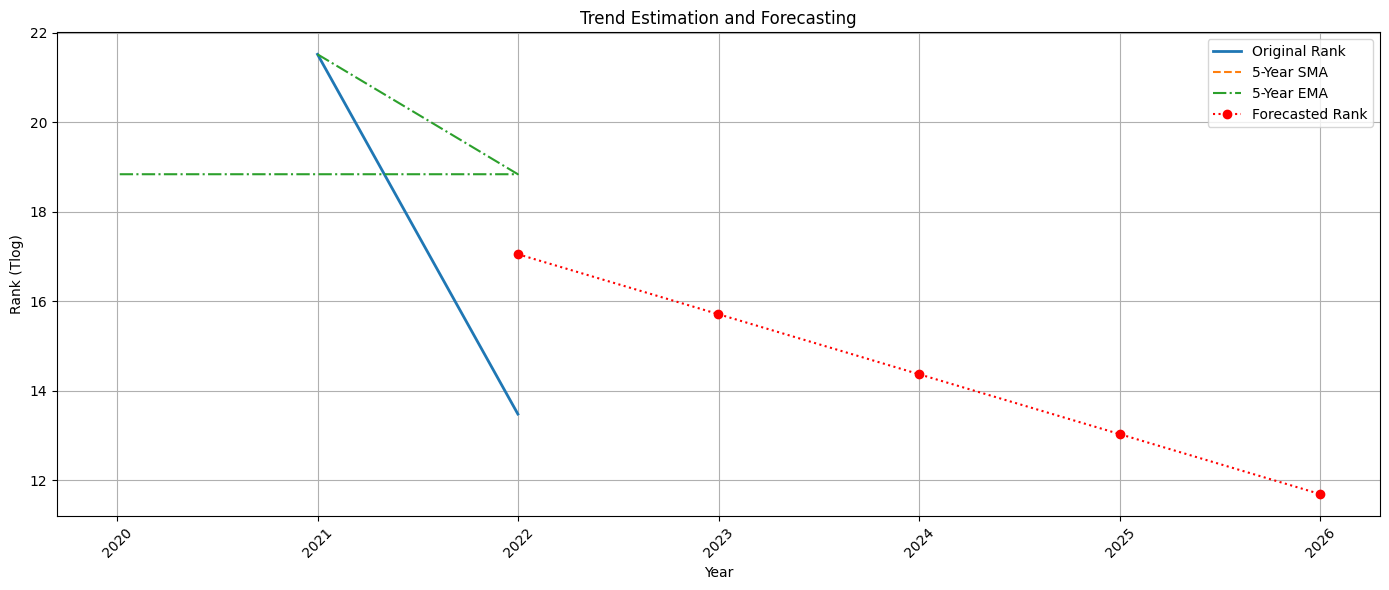

In [12]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Upload file
uploaded = files.upload()

# Step 3: Load data
df = pd.read_csv('cleaned_weather.csv')

# Step 4: Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Step 5: Use 'Tlog' column as the "Rank" (you can change this to 'T' or another if needed)
df = df[['Tlog']].dropna()
df.rename(columns={'Tlog': 'Rank'}, inplace=True)

# Step 6: Check if 2020 exists in the data
if '2020' not in df.index.year:
    print("2020 data is missing. Please check the dataset for 2020.")

# Step 7: Resample data to yearly frequency
df_yearly = df.resample('A').mean()  # 'A' for annual frequency

# Ensure 2020 is represented in the dataset
if '2020' not in df_yearly.index.year:
    # Use pd.concat() instead of append
    new_row = pd.DataFrame({'Rank': [np.nan]}, index=pd.to_datetime(['2020-01-01']))
    df_yearly = pd.concat([df_yearly, new_row])

# 5-year SMA and EMA
sma = df_yearly.rolling(window=5).mean()
ema = df_yearly.ewm(span=5, adjust=False).mean()

# Step 8: Forecast next 5 years using linear extrapolation on EMA
from sklearn.linear_model import LinearRegression

# Prepare for forecasting
ema_dropna = ema.dropna()
X = np.arange(len(ema_dropna)).reshape(-1, 1)
y = ema_dropna['Rank'].values
model = LinearRegression().fit(X, y)

# Forecast next 5 points
future_X = np.arange(len(ema_dropna), len(ema_dropna) + 5).reshape(-1, 1)
future_preds = model.predict(future_X)

# Construct forecast DataFrame
last_date = df_yearly.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(years=1), periods=5, freq='A')
forecast_df = pd.DataFrame({'Rank': future_preds}, index=future_dates)

# Step 9: Plot everything in one graph with improved year display
plt.figure(figsize=(14, 6))
plt.plot(df_yearly, label='Original Rank', linewidth=2)
plt.plot(sma, label='5-Year SMA', linestyle='--')
plt.plot(ema, label='5-Year EMA', linestyle='-.')
plt.plot(forecast_df, label='Forecasted Rank', linestyle=':', marker='o', color='red')

# Enhance year visibility
plt.title('Trend Estimation and Forecasting')
plt.xlabel('Year')
plt.ylabel('Rank (Tlog)')
plt.legend()
plt.grid(True)

# Formatting X-axis to show full years
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()
